## Script to plot eigenvalue spectra
- xlim and ylim on spectrum plots

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pickle

In [2]:
versions = np.array(['May', 'FWstruct'])
name = versions[0]

# limits on size of community matrices
nMin = 2
nMax = 1+13

# parameters for histogram data (for comparison)
rangeReal = [-6,4]
binsReal = 60

filename = name + '_N' + str(nMin) +'-'+ str(nMax-1)
print(filename)

May_N2-13


### Community matrices produced as May or with food web structure
May:  
Matrix entries are nonzero with propability $prob = 0.5$. Nonzero entries are drawn from Normal distribution with $\mu = 0$ and $\sigma = 1$. The diagonal entries are $-d = -1$.

Food web structure:  
Food webs are assembled according to evolution code, with species densties drawn from Normal distribution with $\mu = 0$ and $\sigma = 1$. Feasibility of the food web is not taken into account.

#### Importing data

In [3]:
real, imag = [], []

for n in range(nMin,nMax,1) :
    # loading data
    data = np.loadtxt('../data/spectra/' + name + '_N' + str(n) + '.txt')
    # sorting real and imaginary values
    realTemp = np.concatenate(data.T[0:2*n:2])
    imagTemp = np.concatenate(data.T[1:2*n:2])
    
    real.append(realTemp)
    imag.append(imagTemp)

# saving sorted data
with open('sorted_data/real_' + filename + '.pickle', 'wb') as file:
    pickle.dump(real, file)
with open('sorted_data/imag_' + filename + '.pickle', 'wb') as file:
    pickle.dump(imag, file)

#### Plotting

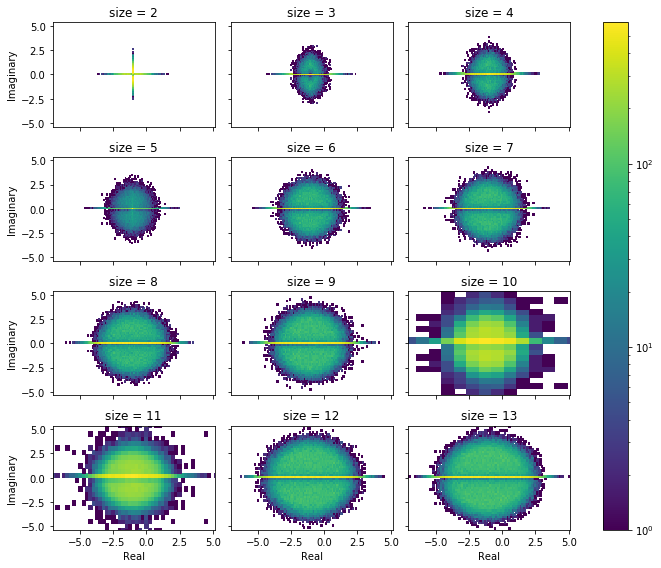

In [4]:
bins = [100,50]
#range2d = [[-1, 0], [-1, 1]]

fig, axes = plt.subplots(4,3, figsize=(10,8), sharex=True, sharey=True)
axes[0,0].set(ylabel='Imaginary')
axes[1,0].set(ylabel='Imaginary')
axes[2,0].set(ylabel='Imaginary')
axes[3,0].set(xlabel='Real', ylabel='Imaginary')
axes[3,1].set(xlabel='Real')
axes[3,2].set(xlabel='Real')

i = 0
for ax in axes.flat:
    ax.set(title='size = ' + str(nMin+i))
    _,_,_, im = ax.hist2d(real[i], imag[i], bins=bins, norm = mpl.colors.LogNorm());
    #_,_,_, im = ax.hist2d(real[i], imag[i], bins=bins, range=range2d, norm = mpl.colors.LogNorm());
    ax.set(autoscale_on=True)
    i += 1

    fig.tight_layout();
fig.colorbar(im, ax=axes.ravel().tolist())  ;      

In [23]:
fig.savefig('../figs/spectra_' + filename +'.png', dpi=100)

### Histogram of real eigenvalues
Producing data for comparing spectra

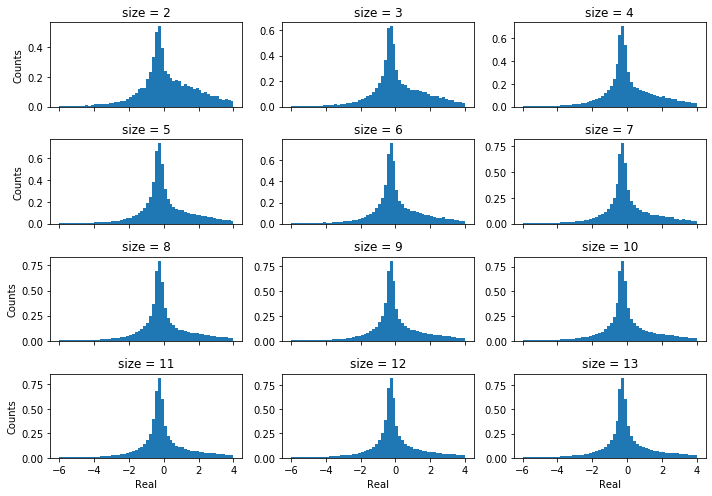

In [38]:
fig, axes = plt.subplots(4,3, figsize=(10,7), sharex=True, sharey=False)
axes[0,0].set(ylabel='Counts')
axes[1,0].set(ylabel='Counts')
axes[2,0].set(ylabel='Counts')
axes[3,0].set(xlabel='Real', ylabel='Counts')
axes[3,1].set(xlabel='Real')
axes[3,2].set(xlabel='Real')

i = 0
countsReal = np.zeros([nMax-nMin, binsReal])
binEdgesReal = np.zeros([nMax-nMin, binsReal+1])

for ax in axes.flat:
    ax.set(title='size = ' + str(nMin+i))
    countsReal[i,:], binEdgesReal[i,:] ,_ = ax.hist(real[i], bins=binsReal, range=rangeReal, density=True);
    i += 1
    
fig.tight_layout();

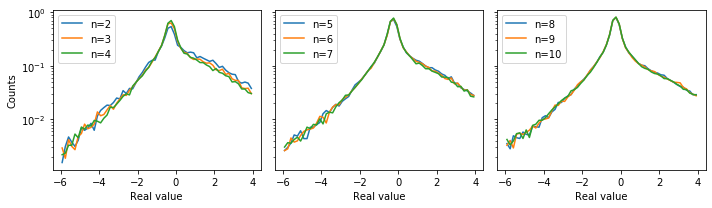

In [25]:
binCentersReal = (binEdgesReal[:,0:-1] + binEdgesReal[:,1:])/2

ii = 3

fig, ax = plt.subplots(1,3, figsize=(10,3), sharey=True);
for i in range(ii) :
    for j in range(3) :
        ax[j].plot(binCentersReal[i+ii*j], countsReal[i+ii*j], label='n='+str(nMin+i+ii*j));
        ax[j].set(xlabel='Real value', yscale='log')
        ax[j].legend();
        
ax[0].set(ylabel='Counts');
fig.tight_layout();

In [26]:
np.savetxt('sorted_data/x' + filename + '_binned.txt', binCentersReal, newline='\n')
np.savetxt('sorted_data/y' + filename + '_binned.txt', countsReal, newline='\n')

### Histogram of imaginary eigenvalues

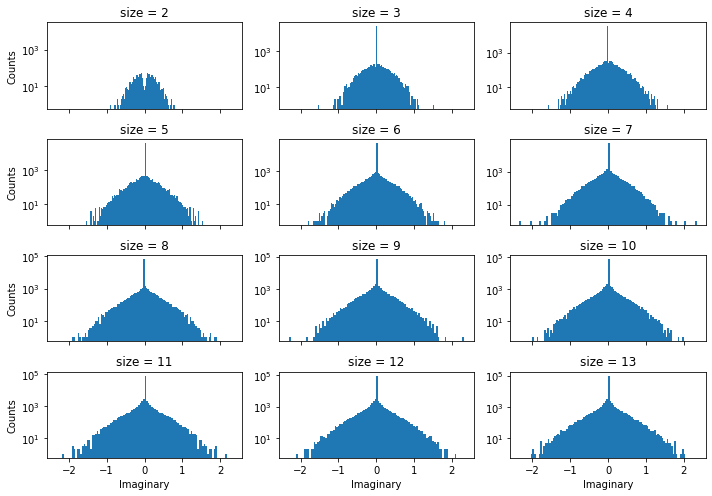

In [27]:
bins = 100

fig, axes = plt.subplots(4,3, figsize=(10,7), sharex=True, sharey=False)
axes[0,0].set(ylabel='Counts')
axes[1,0].set(ylabel='Counts')
axes[2,0].set(ylabel='Counts')
axes[3,0].set(xlabel='Imaginary', ylabel='Counts')
axes[3,1].set(xlabel='Imaginary')
axes[3,2].set(xlabel='Imaginary')

i = 0
countsImag = np.zeros([nMax-nMin, bins])
binEdgesImag = np.zeros([nMax-nMin, bins+1])

for ax in axes.flat:
    ax.set(title='size = ' + str(nMin+i))
    countsImag[i,:], binEdgesImag[i,:] ,_ = ax.hist(imag[i], bins=bins);
    ax.set(yscale='log')
    i += 1
    
fig.tight_layout();